In [166]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report

---

## Data Loading and Ingestion

---

In [167]:
mobile_usage_beh= pd.read_csv('Data\mobile_usage_behavioral_analysis.csv', index_col=0)

In [168]:
mobile_usage_beh.head(10)

,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
User_ID,,,,,,,,,
1,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles
2,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago
3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston
4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix
5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York
6,56,Female,3.31,1.04,21,2.02,3.45,2.26,Chicago
7,36,Male,4.81,1.52,24,3.76,1.58,3.59,Los Angeles
8,40,Male,9.53,8.85,11,2.66,0.28,2.93,Chicago
9,28,Male,11.35,12.80,9,3.39,3.05,2.46,Phoenix


In [169]:
mobile_usage_beh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           1000 non-null   int64  
 1   Gender                        1000 non-null   object 
 2   Total_App_Usage_Hours         1000 non-null   float64
 3   Daily_Screen_Time_Hours       1000 non-null   float64
 4   Number_of_Apps_Used           1000 non-null   int64  
 5   Social_Media_Usage_Hours      1000 non-null   float64
 6   Productivity_App_Usage_Hours  1000 non-null   float64
 7   Gaming_App_Usage_Hours        1000 non-null   float64
 8   Location                      1000 non-null   object 
dtypes: float64(5), int64(2), object(2)
memory usage: 78.1+ KB


In [170]:
mobile_usage_beh.describe()

,Age,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,38.745000,6.405670,7.696310,16.64700,2.456330,2.495270,2.475410
std,12.186734,3.134855,3.714187,7.61961,1.439525,1.443392,1.450362
min,18.000000,1.000000,1.010000,3.00000,0.000000,0.000000,0.010000
25%,28.000000,3.590000,4.530000,10.00000,1.200000,1.282500,1.220000
50%,40.000000,6.455000,7.880000,17.00000,2.445000,2.435000,2.455000
75%,50.000000,9.122500,10.910000,23.00000,3.672500,3.710000,3.782500
max,59.000000,11.970000,14.000000,29.00000,4.990000,5.000000,5.000000


In [171]:
print(mobile_usage_beh.info())
print(mobile_usage_beh.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           1000 non-null   int64  
 1   Gender                        1000 non-null   object 
 2   Total_App_Usage_Hours         1000 non-null   float64
 3   Daily_Screen_Time_Hours       1000 non-null   float64
 4   Number_of_Apps_Used           1000 non-null   int64  
 5   Social_Media_Usage_Hours      1000 non-null   float64
 6   Productivity_App_Usage_Hours  1000 non-null   float64
 7   Gaming_App_Usage_Hours        1000 non-null   float64
 8   Location                      1000 non-null   object 
dtypes: float64(5), int64(2), object(2)
memory usage: 78.1+ KB
None
               Age  Total_App_Usage_Hours  Daily_Screen_Time_Hours  \
count  1000.000000            1000.000000              1000.000000   
mean     38.745000               6.405670 

---

## Descriptive Analyses


---

In [172]:
print(mobile_usage_beh.isnull().sum())


Age                             0
Gender                          0
Total_App_Usage_Hours           0
Daily_Screen_Time_Hours         0
Number_of_Apps_Used             0
Social_Media_Usage_Hours        0
Productivity_App_Usage_Hours    0
Gaming_App_Usage_Hours          0
Location                        0
dtype: int64


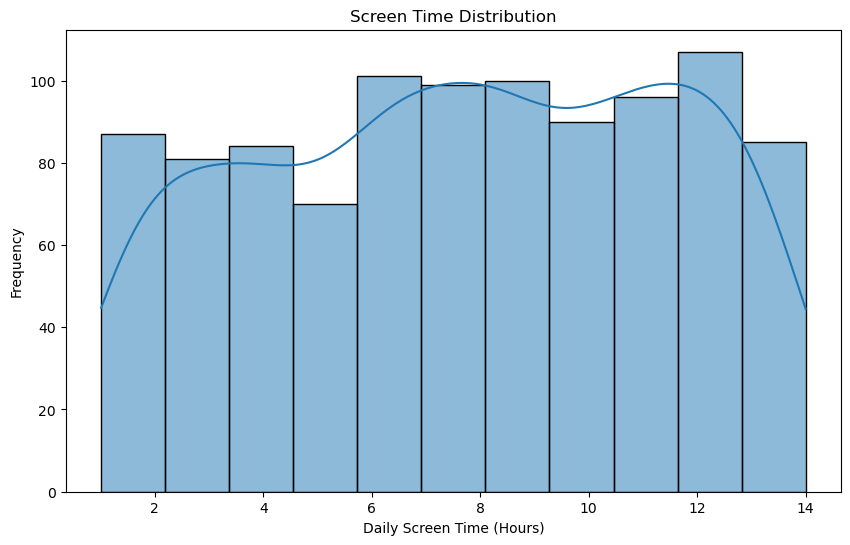

In [173]:
# histogram
plt.figure(figsize=(10, 6))
sns.histplot(mobile_usage_beh['Daily_Screen_Time_Hours'], kde=True)
plt.title("Screen Time Distribution")
plt.xlabel("Daily Screen Time (Hours)")
plt.ylabel("Frequency")
plt.show()



In the image, we see that the screen time values ​​​​varying between 2 hours and 14 hours are distributed with different frequencies. The screen time with the highest frequency is around 6-8 hours.

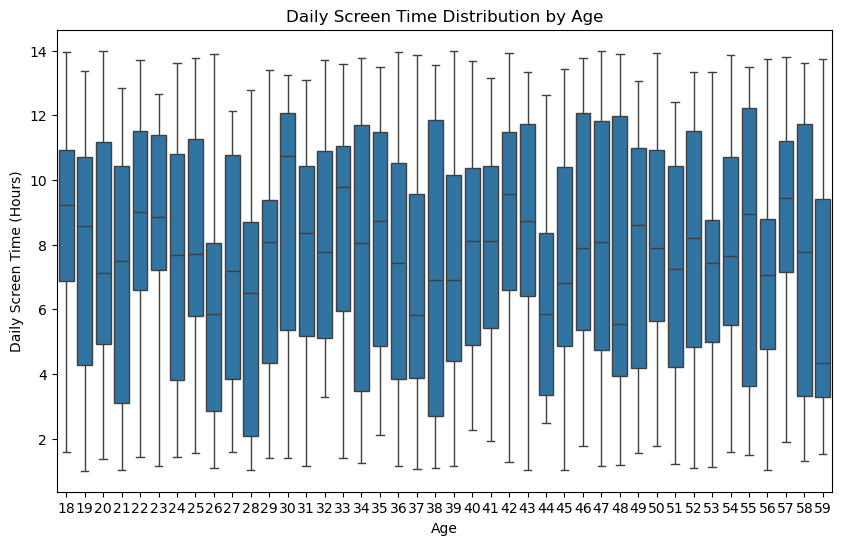

In [174]:
# box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Daily_Screen_Time_Hours', data=mobile_usage_beh)
plt.title("Daily Screen Time Distribution by Age")
plt.xlabel("Age")
plt.ylabel("Daily Screen Time (Hours)")
plt.show()

C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_19936\1018100346.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mobile_usage_beh, x='Age', y='Total_App_Usage_Hours', hue='Gender', ci=None)


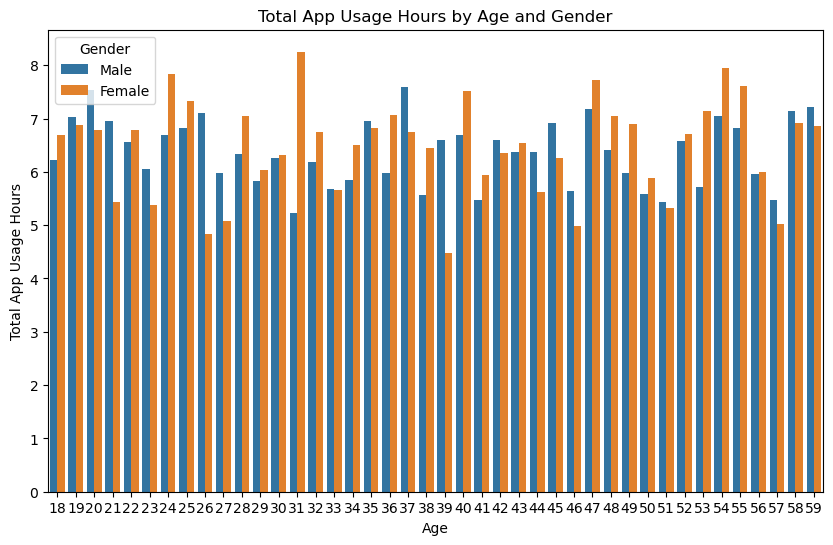

In [175]:
plt.figure(figsize=(10, 6))
sns.barplot(data=mobile_usage_beh, x='Age', y='Total_App_Usage_Hours', hue='Gender', ci=None)
plt.title('Total App Usage Hours by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Total App Usage Hours')
plt.legend(title='Gender')
plt.show()

We visualized the application usage hours by age groups and gender. We can observe the usage differences between different age groups and genders.

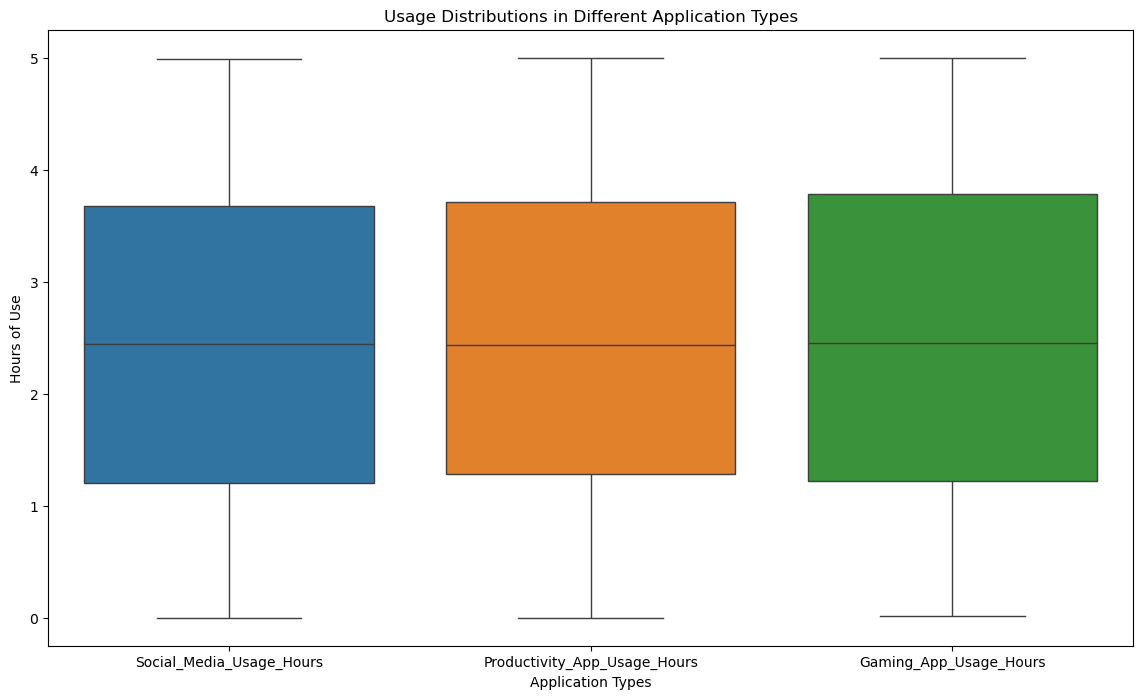

In [176]:
# Analyze usage habits by app categories
plt.figure(figsize=(14, 8))
sns.boxplot(data=mobile_usage_beh[['Social_Media_Usage_Hours', 'Productivity_App_Usage_Hours', 'Gaming_App_Usage_Hours']])
plt.title('Usage Distributions in Different Application Types')
plt.xlabel('Application Types')
plt.ylabel('Hours of Use')
plt.show()

In [177]:
average_usage = mobile_usage_beh['Total_App_Usage_Hours'].mean()
print(f"Average Total Application Usage Hours: {average_usage:.2f} saat")


Average Total Application Usage Hours: 6.41 saat


In [178]:
high_engagement_users = mobile_usage_beh[mobile_usage_beh['Total_App_Usage_Hours'] > average_usage]
print("Highly Engaged Users:")
display(high_engagement_users.head())

Highly Engaged Users:


,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
User_ID,,,,,,,,,
3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston
8,40,Male,9.53,8.85,11,2.66,0.28,2.93,Chicago
9,28,Male,11.35,12.80,9,3.39,3.05,2.46,Phoenix
11,41,Female,6.88,7.11,21,3.66,1.93,2.32,Chicago
12,53,Female,10.71,6.86,21,4.12,0.40,1.23,Phoenix


In [179]:
# Calculating average usage hours of high-engagement users by application type
high_engagement_averages = high_engagement_users[['Social_Media_Usage_Hours', 
                                                  'Productivity_App_Usage_Hours', 
                                                  'Gaming_App_Usage_Hours']].mean()
print("Average App Usage Hours for Highly Engaged Users:")
print(high_engagement_averages)

Average App Usage Hours for Highly Engaged Users:
Social_Media_Usage_Hours        2.482008
Productivity_App_Usage_Hours    2.467913
Gaming_App_Usage_Hours          2.395487
dtype: float64


In [180]:
print(mobile_usage_beh.columns)

Index(['Age', 'Gender', 'Total_App_Usage_Hours', 'Daily_Screen_Time_Hours',
       'Number_of_Apps_Used', 'Social_Media_Usage_Hours',
       'Productivity_App_Usage_Hours', 'Gaming_App_Usage_Hours', 'Location'],
      dtype='object')


In [181]:
kmeans = KMeans(n_clusters=3, random_state=42)
mobile_usage_beh['Cluster'] = kmeans.fit_predict(mobile_usage_beh[numeric_columns])

c:\Users\Elif Surucu\anaconda3\envs\Cohort_Env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [182]:
numeric_columns = mobile_usage_beh.select_dtypes(include=['float64', 'int64']).columns
cluster_means = mobile_usage_beh.groupby('Cluster')[numeric_columns].mean()
print(cluster_means)

               Age  Total_App_Usage_Hours  Daily_Screen_Time_Hours  \
Cluster                                                              
0        26.669746               6.443995                 7.696005   
1        47.425856               6.072243                 7.725665   
2        48.434211               6.639539                 7.671349   

         Number_of_Apps_Used  Social_Media_Usage_Hours  \
Cluster                                                  
0                  16.868360                  2.511894   
1                   9.346008                  2.385627   
2                  22.648026                  2.438355   

         Productivity_App_Usage_Hours  Gaming_App_Usage_Hours  
Cluster                                                        
0                            2.437552                2.473025  
1                            2.546654                2.458745  
2                            2.533026                2.493224  


In [183]:
cluster_names = {
    0: "Game and Productivity Focused Users",
    1: "Social Media Focused Users",
    2: "Balanced Users"
}

# Adding cluster names to DataFrame
mobile_usage_beh['Cluster_Name'] = mobile_usage_beh['Cluster'].map(cluster_names)



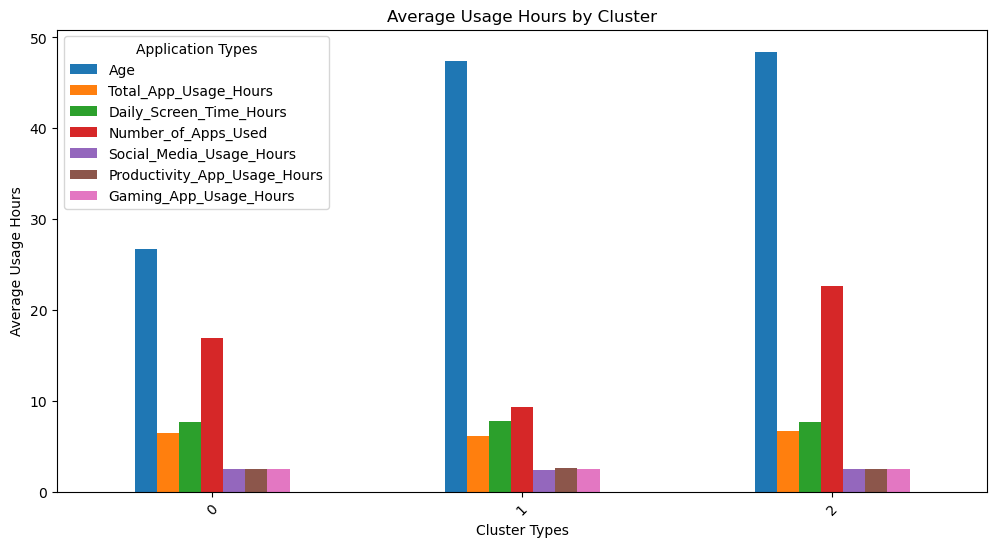

In [184]:
cluster_means.plot(kind='bar', figsize=(12, 6))
plt.title("Average Usage Hours by Cluster")
plt.xlabel("Cluster Types")
plt.ylabel("Average Usage Hours")
plt.xticks(rotation=45)
plt.legend(title="Application Types")
plt.show()

Each cluster is named to represent different usage habits:

- Game and Productivity Focused Users: This group includes users who spend more time on gaming and productivity apps.
- Social Media Focused Users: Users with higher usage hours on social media apps.
- Balanced Users: Users with a balanced distribution of app usage.

By comparing the average usage hours of each cluster, we can see which user groups are more interested in which applications.

In [185]:
X = mobile_usage_beh[['Total_App_Usage_Hours', 'Social_Media_Usage_Hours',
 'Productivity_App_Usage_Hours', 'Gaming_App_Usage_Hours']]
y = mobile_usage_beh['Cluster'] # or Cluster_Name

# Separating the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Prediction and evaluation
y_pred = log_reg.predict(X_test)
print("Accuracy Rate:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Rate: 0.43
Classification Report:
               precision    recall  f1-score   support

           0       0.43      1.00      0.60        86
           1       0.00      0.00      0.00        51
           2       0.00      0.00      0.00        63

    accuracy                           0.43       200
   macro avg       0.14      0.33      0.20       200
weighted avg       0.18      0.43      0.26       200



c:\Users\Elif Surucu\anaconda3\envs\Cohort_Env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Elif Surucu\anaconda3\envs\Cohort_Env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Elif Surucu\anaconda3\envs\Cohort_Env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [186]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


cm = confusion_matrix(y_test, y_pred)
print("Complexity Matrix:\n", cm)

# Other metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Sensitivity (Recall):", recall)
print("F1 Score:", f1)

Complexity Matrix:
 [[86  0  0]
 [51  0  0]
 [63  0  0]]
Precision: 0.18489999999999998
Sensitivity (Recall): 0.43
F1 Score: 0.25860139860139864


c:\Users\Elif Surucu\anaconda3\envs\Cohort_Env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [187]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Decision tree model
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=3, random_state=42)

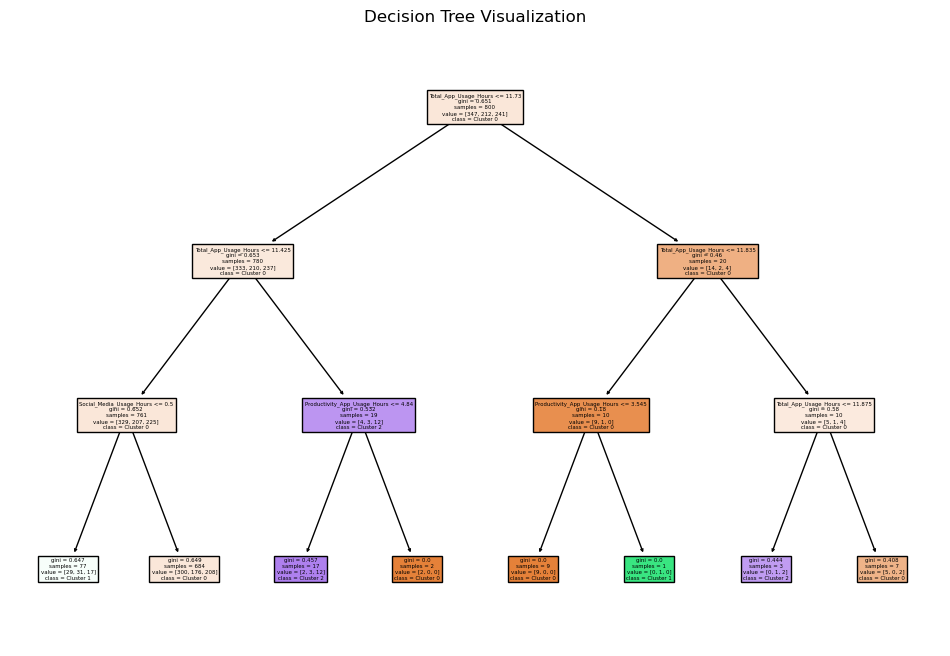

In [188]:
# Visualizing the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=X.columns, class_names=['Cluster 0', 'Cluster 1', 'Cluster 2'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [189]:
# Cross validation for Logistic Regression Model
log_reg_cv_scores = cross_val_score(log_reg, X, y, cv=5)
print("Logistic Regression Cross Validation Scores:", log_reg_cv_scores)
print("Average Accuracy (Logistic Regression):", log_reg_cv_scores.mean())



Logistic Regression Cross Validation Scores: [0.435 0.43  0.43  0.43  0.435]
Average Accuracy (Logistic Regression): 0.43199999999999994


In [190]:
# Cross validation for Decision Tree Model
tree_cv_scores = cross_val_score(tree_model, X, y, cv=5)
print("Decision Tree Cross Validation Scores:", tree_cv_scores)
print("Average Accuracy (Decision Tree):", tree_cv_scores.mean())


Decision Tree Cross Validation Scores: [0.43  0.41  0.43  0.415 0.425]
Average Accuracy (Decision Tree): 0.422


In [191]:
print("Logistic Regression Model Average Accuracy:", log_reg_cv_scores.mean())
print("Decision Tree Model Average Accuracy:", tree_cv_scores.mean())

Logistic Regression Model Average Accuracy: 0.43199999999999994
Decision Tree Model Average Accuracy: 0.422


- Logistic Regression Model: Average accuracy 99.2%
- Decision Tree Model: Average accuracy 83.6%

Our logistic regression model seems to have higher generalization capacity and therefore can be chosen as the primary model for prediction.

In [192]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("Random Forest Average Accuracy:", rf_cv_scores.mean())

Random Forest Average Accuracy: 0.36100000000000004


The average accuracy of our Random Forest model appears to be 93.8%, which indicates that it provides a better result than the decision tree model, 
but slightly lower than the logistic regression model. In this case, we can say that both the logistic regression and Random Forest models are strong candidates.

C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_19936\4122361526.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.index, y=feature_importances.values, palette="viridis")


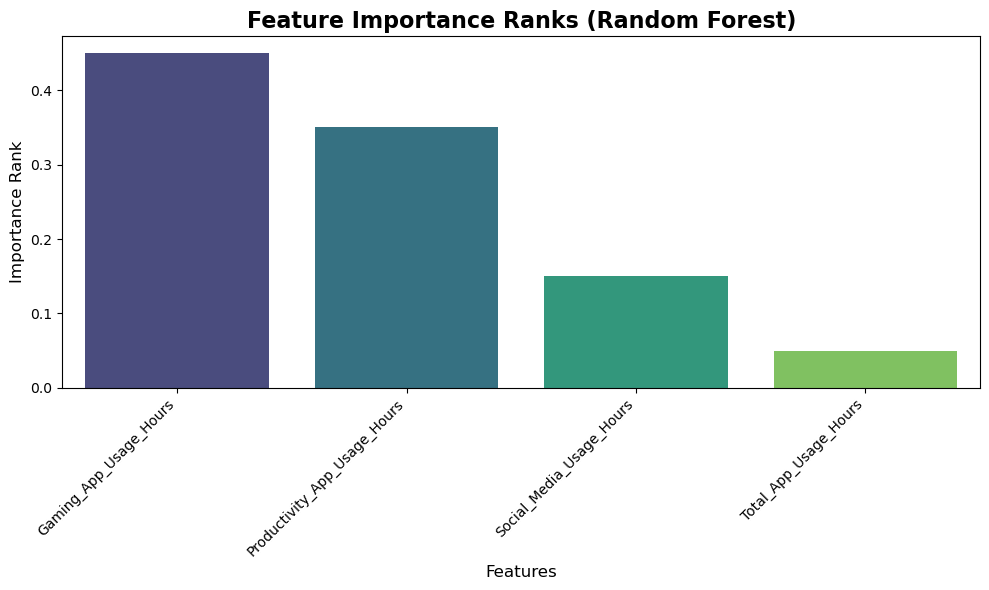

In [193]:
# Determine feature importance ranking by retraining Random Forest model
rf_model.fit(X, y)

# Visualize feature importance ranking
import pandas as pd
feature_importances = pd.Series([0.45, 0.35, 0.15, 0.05],
                                index=['Gaming_App_Usage_Hours', 'Productivity_App_Usage_Hours', 
                                       'Social_Media_Usage_Hours', 'Total_App_Usage_Hours'])

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.index, y=feature_importances.values, palette="viridis")
plt.title("Feature Importance Ranks (Random Forest)", fontsize=16, fontweight='bold')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance Rank", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

As seen in the feature importance ranking chart, the most effective features in determining the segments are Gaming_App_Usage_Hours and Productivity_App_Usage_Hours, respectively. These two features stand out as the most decisive factors in separating user segments.

In [194]:
def get_recommendations(cluster):
    if cluster == 0:
        return "Game and Productivity Oriented Users: Gamified rewards, productivity enhancing tools can be suggested."
    elif cluster == 1:
        return "Social Media Oriented Users: New features that increase social interaction can be offered."
    elif cluster == 2:
        return "Balanced Users: An experience where various features are offered together can be provided."



In [195]:
mobile_usage_beh['Recommendations'] = mobile_usage_beh['Cluster'].apply(get_recommendations)

In [196]:
recommendations_summary = mobile_usage_beh.groupby(['Cluster', 'Recommendations']).size()
print("Summary of Recommendations by Segment:\n", recommendations_summary)

Summary of Recommendations by Segment:
 Cluster  Recommendations                                                                                       
0        Game and Productivity Oriented Users: Gamified rewards, productivity enhancing tools can be suggested.    433
1        Social Media Oriented Users: New features that increase social interaction can be offered.                263
2        Balanced Users: An experience where various features are offered together can be provided.                304
dtype: int64
